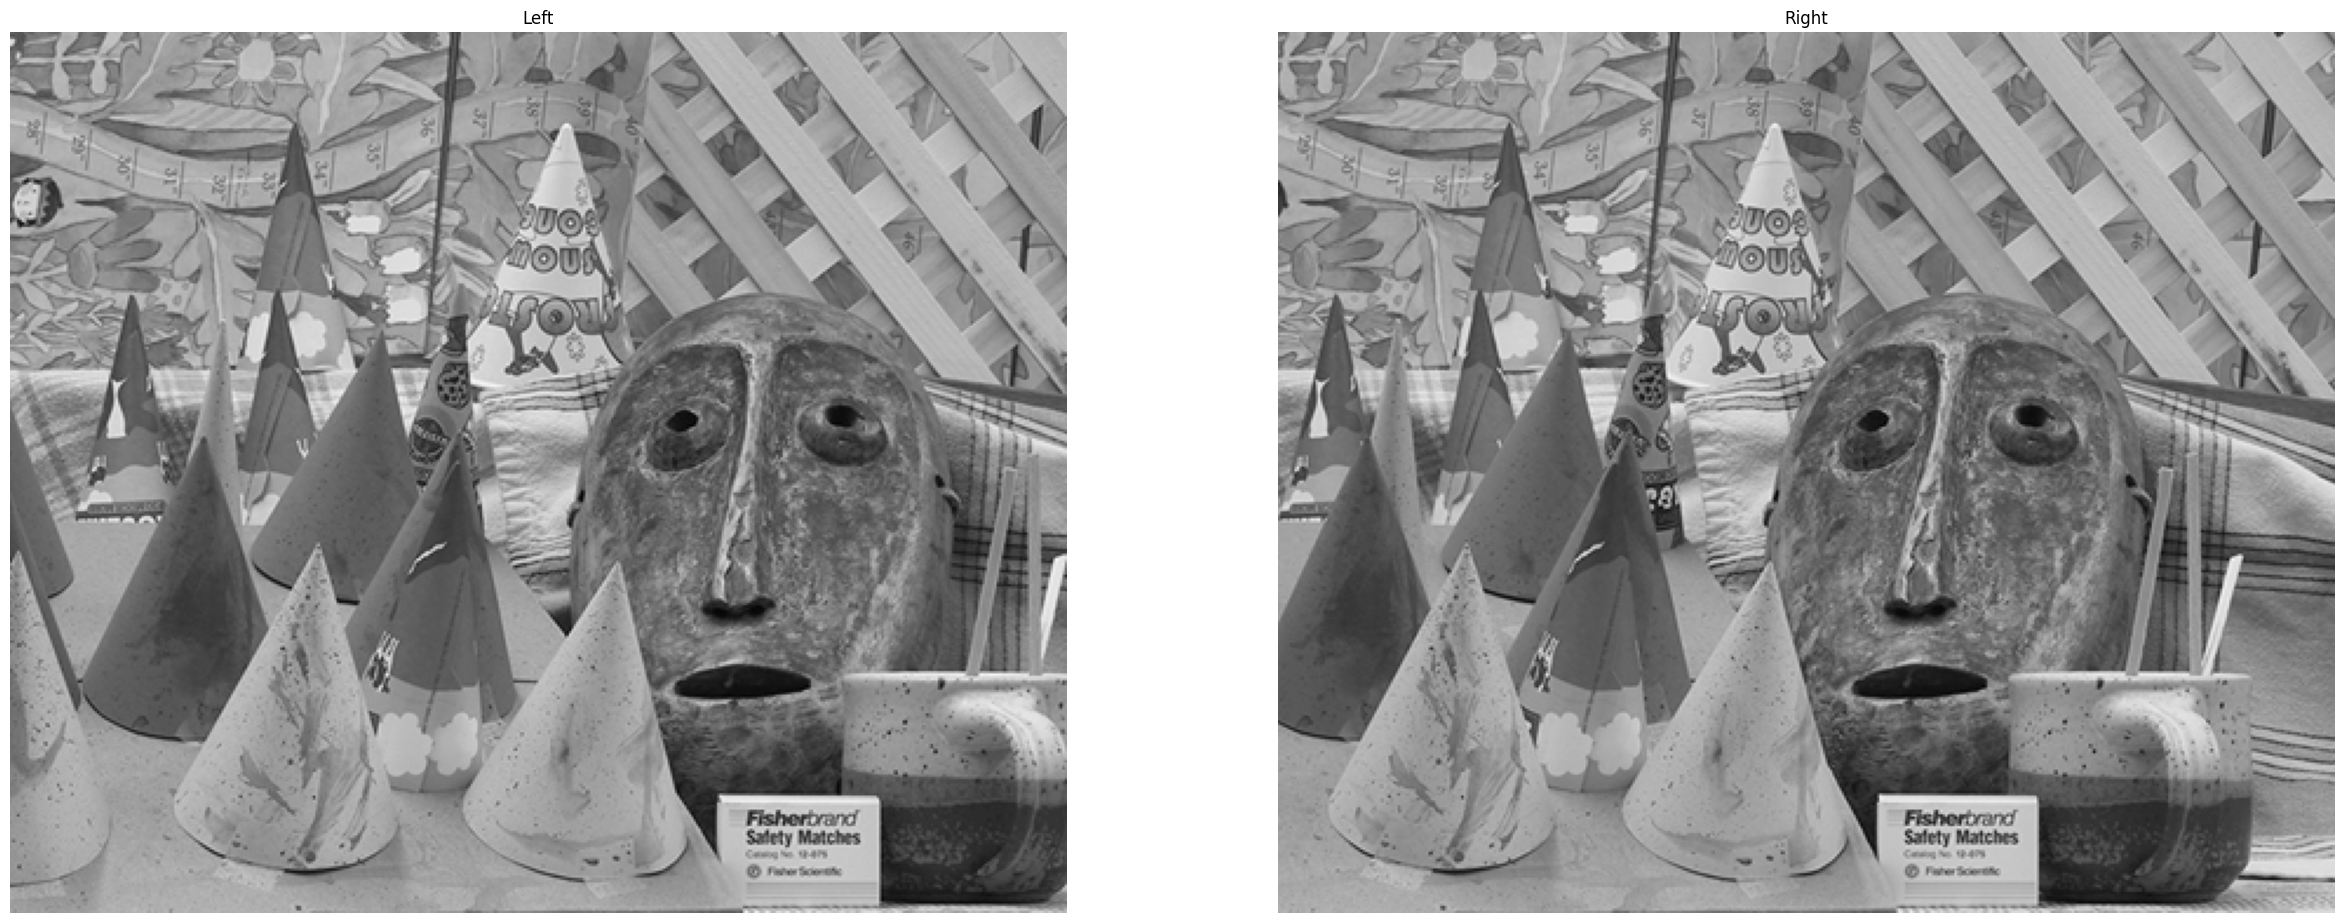

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_left = cv2.imread('im2.png', cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread('im6.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(30,30))
plt.subplot(2,2,1); plt.imshow(img_left, cmap='gray'); plt.title('Left'); plt.axis('off')
plt.subplot(2,2,2); plt.imshow(img_right, cmap='gray'); plt.title('Right'); plt.axis('off')

plt.show()

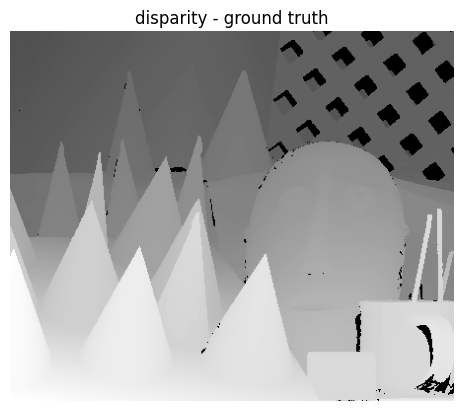

In [7]:
ground_truth = cv2.imread('disp2.png', cv2.IMREAD_UNCHANGED)

plt.figure()
plt.imshow(ground_truth, cmap='gray'); plt.title('disparity - ground truth'); plt.axis('off')
plt.show()

RMSE StereoBM: 85.85
RMSE StereoSGBM: 68.45


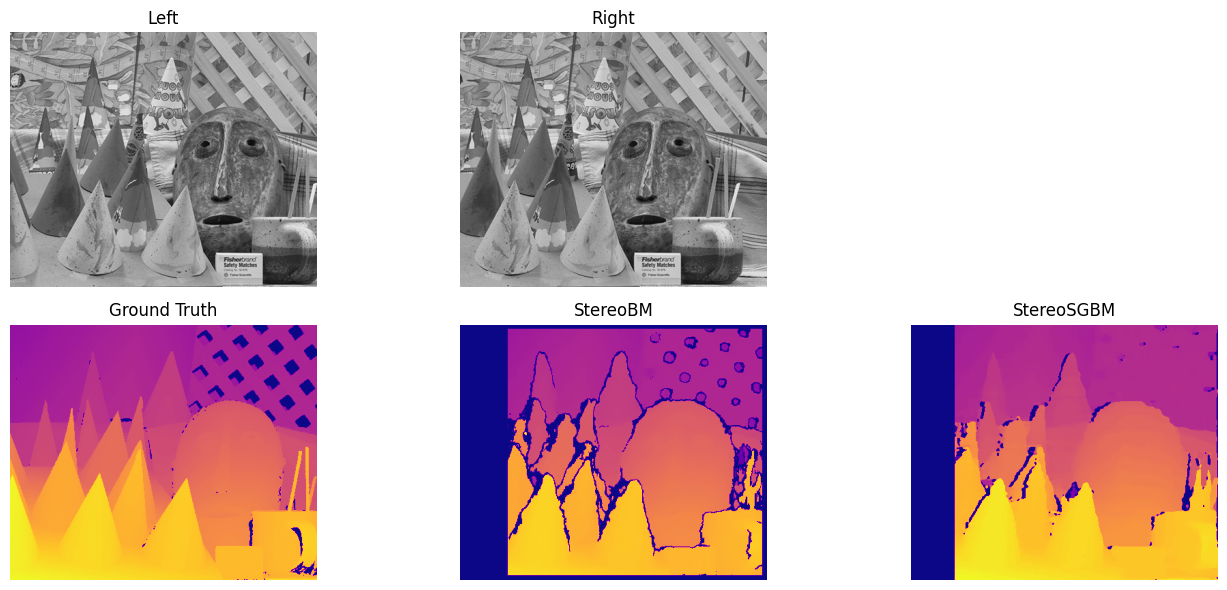

In [57]:
stereo_bm = cv2.StereoBM_create(numDisparities=64, blockSize=15)
disparity_bm = stereo_bm.compute(img_left, img_right)

stereo_sgbm = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=64,
    blockSize=5,
    P1=8 * 3 * 5 ** 2,
    P2=32 * 3 * 5 ** 2,
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)
disparity_sgbm = stereo_sgbm.compute(img_left, img_right)

disparity_bm_norm = cv2.normalize(disparity_bm, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disparity_bm_norm = np.uint8(disparity_bm_norm)

disparity_sgbm_norm = cv2.normalize(disparity_sgbm, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disparity_sgbm_norm = np.uint8(disparity_sgbm_norm)


ground_truth_norm = cv2.normalize(ground_truth, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
ground_truth_norm = np.uint8(ground_truth_norm)


def compute_rmse(predicted, ground_truth):
    mask = ground_truth > 0  
    predicted = cv2.resize(predicted, (ground_truth.shape[1], ground_truth.shape[0]))
    return np.sqrt(np.mean((predicted[mask].astype(np.float32) - ground_truth[mask].astype(np.float32)) ** 2))

rmse_bm = compute_rmse(disparity_bm_norm, ground_truth_norm)
rmse_sgbm = compute_rmse(disparity_sgbm_norm, ground_truth_norm)

print(f"RMSE StereoBM: {rmse_bm:.2f}")
print(f"RMSE StereoSGBM: {rmse_sgbm:.2f}")

plt.figure(figsize=(14,6))

plt.subplot(2,3,1); plt.imshow(img_left, cmap='gray'); plt.title('Left'); plt.axis('off')
plt.subplot(2,3,2); plt.imshow(img_right, cmap='gray'); plt.title('Right'); plt.axis('off')
plt.subplot(2,3,4); plt.imshow(ground_truth_norm, cmap='plasma'); plt.title('Ground Truth'); plt.axis('off')

plt.subplot(2,3,5); plt.imshow(disparity_bm_norm, cmap='plasma'); plt.title('StereoBM'); plt.axis('off')
plt.subplot(2,3,6); plt.imshow(disparity_sgbm_norm, cmap='plasma'); plt.title('StereoSGBM'); plt.axis('off')

plt.tight_layout()
plt.show()

RMSE StereoSGBM: 62.65


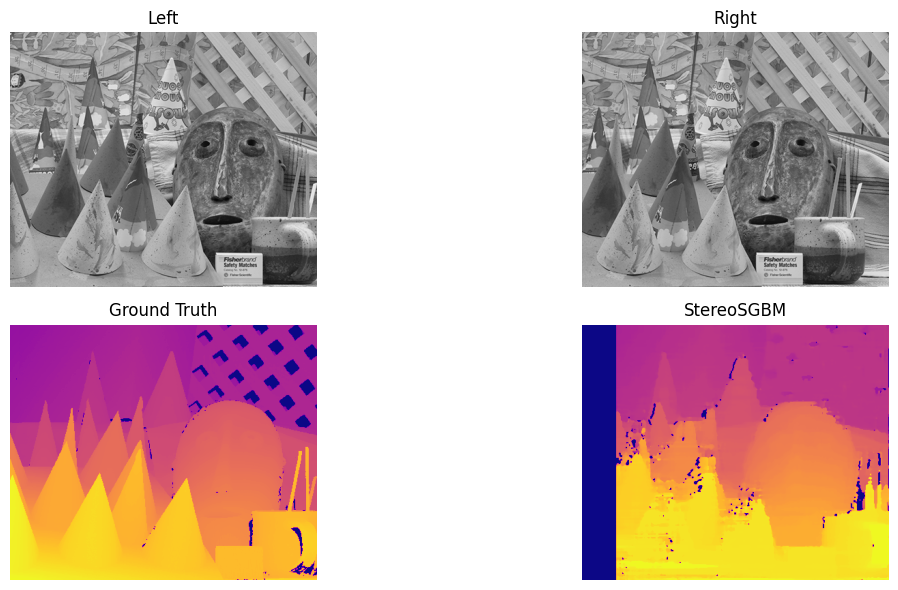

In [69]:
stereo_sgbm = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=50,  
    blockSize=3,  
    P1=4 * 2 * 5 ** 2,  
    P2=256 * 4 * 5 ** 2, 
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)

disparity_sgbm = stereo_sgbm.compute(img_left, img_right)

disparity_normalized = cv2.normalize(disparity_sgbm, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disparity_normalized = np.uint8(disparity_normalized) 

ground_truth_norm = cv2.normalize(ground_truth, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
ground_truth_norm = np.uint8(ground_truth_norm)


rmse_sgbm = compute_rmse(disparity_normalized, ground_truth_norm)

print(f"RMSE StereoSGBM: {rmse_sgbm:.2f}")

plt.figure(figsize=(14,6))

plt.subplot(2,2,1); plt.imshow(img_left, cmap='gray'); plt.title('Left'); plt.axis('off')
plt.subplot(2,2,2); plt.imshow(img_right, cmap='gray'); plt.title('Right'); plt.axis('off')
plt.subplot(2,2,3); plt.imshow(ground_truth_norm, cmap='plasma'); plt.title('Ground Truth'); plt.axis('off')

plt.subplot(2,2,4); plt.imshow(disparity_normalized, cmap='plasma'); plt.title('StereoSGBM'); plt.axis('off')

plt.tight_layout()
plt.show()